In [58]:
import os
import numpy as np
import cv2
import gc

In [59]:
data=np.load('/content/drive/MyDrive/data/data_preprocess1.npz')


In [60]:
x=data['arr_0']
y=data['arr_1']

In [61]:
x.shape,y.shape

((9968, 100, 100, 3), (9968,))

In [62]:
np.unique(y)

array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
      dtype='<U15')

In [63]:
y_array

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [64]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
onehot=OneHotEncoder()
y_onehot=onehot.fit_transform(y.reshape(-1,1))

In [66]:
y_array=y_onehot.toarray()

In [67]:
y_array.shape

(9968, 4)

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_array,test_size=0.2,random_state=42)

In [69]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7974, 100, 100, 3), (1994, 100, 100, 3), (7974, 4), (1994, 4))

In [70]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [81]:
model=Sequential([layers.Conv2D(32,3,padding='same', input_shape=(100,100,3),activation='relu'),layers.MaxPool2D(),layers.Conv2D(32,3,padding='same',activation='relu'),layers.MaxPool2D(),layers.Conv2D(64,3,padding='same',activation='relu'),layers.MaxPool2D(),layers.Flatten(),layers.Dense(192,activation='relu'),layers.Dense(28,activation='relu'),layers.Dense(4,activation='sigmoid')])

In [82]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 50, 50, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 25, 25, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 12, 12, 64)       

In [84]:
history=model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=15,epochs=15)

Epoch 1/15
532/532 [==============================] - 116s 216ms/step - loss: 0.2486 - accuracy: 0.9090 - val_loss: 0.1065 - val_accuracy: 0.9664
Epoch 2/15
532/532 [==============================] - 117s 221ms/step - loss: 0.0921 - accuracy: 0.9678 - val_loss: 0.1095 - val_accuracy: 0.9649
Epoch 3/15
532/532 [==============================] - 109s 205ms/step - loss: 0.0571 - accuracy: 0.9823 - val_loss: 0.0814 - val_accuracy: 0.9719
Epoch 4/15
532/532 [==============================] - 115s 216ms/step - loss: 0.0394 - accuracy: 0.9860 - val_loss: 0.0753 - val_accuracy: 0.9779
Epoch 5/15
532/532 [==============================] - 114s 215ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.1250 - val_accuracy: 0.9694
Epoch 6/15
532/532 [==============================] - 114s 214ms/step - loss: 0.0291 - accuracy: 0.9903 - val_loss: 0.0845 - val_accuracy: 0.9769
Epoch 7/15
532/532 [==============================] - 114s 214ms/step - loss: 0.0167 - accuracy: 0.9944 - val_loss: 0.0731 -

In [85]:
import pandas as pd
import matplotlib.pyplot as plt


In [86]:
history_df=pd.DataFrame(history.history)

In [87]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.248577,0.908954,0.106476,0.966399
1,0.092061,0.967770,0.109550,0.964895
2,0.057065,0.982318,0.081378,0.971916
3,0.039351,0.985954,0.075345,0.977934
4,0.028505,0.990594,0.125040,0.969408
5,0.029122,0.990344,0.084474,0.976931
6,0.016739,0.994357,0.073073,0.980943
7,0.018879,0.994607,0.097899,0.976429
8,0.013596,0.994984,0.096559,0.977432
9,0.008914,0.997366,0.127229,0.971414


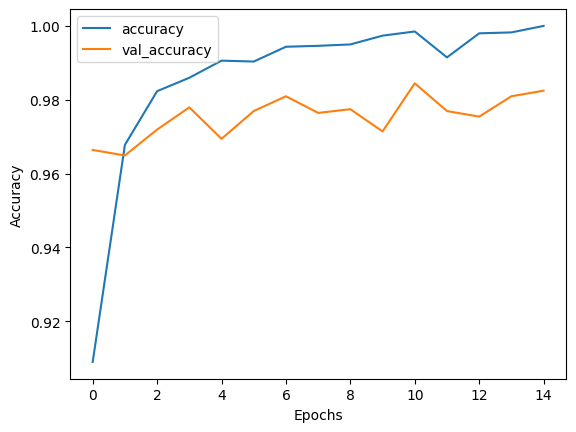

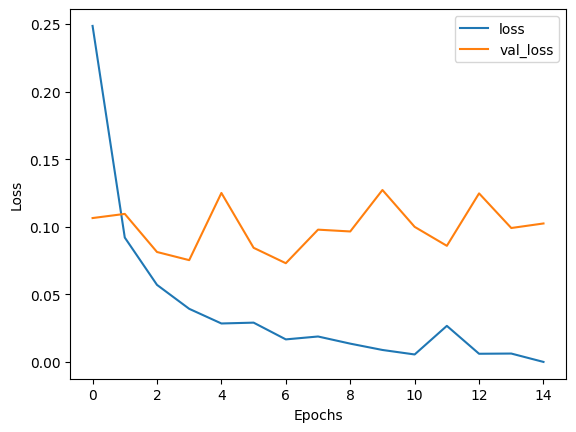

In [88]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [89]:
model.save('/content/drive/MyDrive/FaceMaskDetectionProject/cnn_modelk6.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [90]:
onehot.categories_

[array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
       dtype='<U15')]